<a href="https://colab.research.google.com/github/FelixEbenezer/Deep-Learning-TensorFlow-Hub/blob/main/TensorFlow_Hub_GAN_ilimitada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Hub - GAN ilimitada

- Baseado em: https://www.tensorflow.org/hub/tutorials/boundless?hl=pt-br
- Paper da técnica: https://arxiv.org/pdf/1908.07007.pdf

# Importação das bibliotecas

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
print('Versão do TensorFlow: ', tf.__version__)
print('Versão do TensorFlow Hub: ', hub.__version__)

Versão do TensorFlow:  2.8.2
Versão do TensorFlow Hub:  0.12.0


# Carregamento da imagem

In [ ]:
imagem = Image.open('/content/Marmolada_Sunset.jpeg')

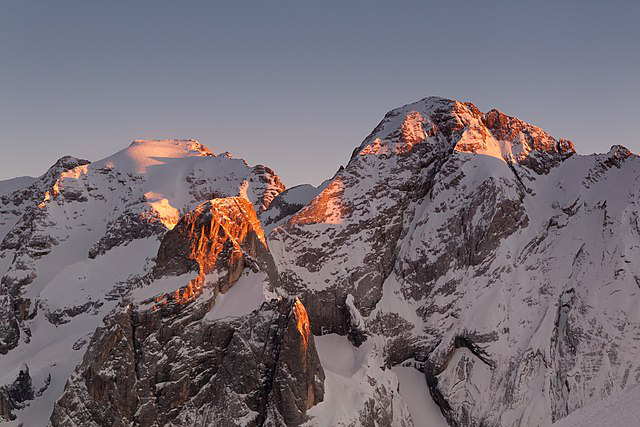

In [ ]:
imagem

In [ ]:
largura, altura = imagem.size
print(largura, altura)

640 427


In [ ]:
#imagem = imagem.crop((0, 0, altura, altura))
#imagem

In [ ]:
imagem.size

(640, 427)

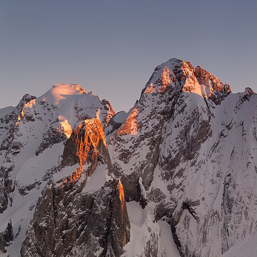

In [ ]:
imagem = imagem.resize((257, 257))
imagem

In [ ]:
imagem.size

(257, 257)

In [ ]:
type(imagem)

PIL.Image.Image

In [ ]:
imagem = np.array(imagem)

In [ ]:
type(imagem)

numpy.ndarray

In [ ]:
imagem

array([[[105, 117, 139],
        [105, 117, 139],
        [105, 117, 139],
        ...,
        [103, 110, 136],
        [104, 111, 137],
        [105, 112, 138]],

       [[104, 116, 138],
        [104, 116, 138],
        [104, 116, 138],
        ...,
        [104, 111, 137],
        [105, 112, 138],
        [105, 112, 138]],

       [[106, 118, 140],
        [106, 118, 140],
        [106, 118, 140],
        ...,
        [105, 112, 138],
        [105, 112, 138],
        [106, 113, 139]],

       ...,

       [[128, 119, 120],
        [143, 134, 132],
        [140, 129, 128],
        ...,
        [138, 126, 134],
        [138, 125, 134],
        [136, 123, 132]],

       [[138, 129, 130],
        [134, 125, 125],
        [135, 125, 124],
        ...,
        [137, 125, 133],
        [139, 126, 135],
        [136, 123, 132]],

       [[134, 125, 127],
        [134, 126, 126],
        [135, 127, 126],
        ...,
        [138, 125, 134],
        [138, 123, 133],
        [141, 125, 135]]

In [ ]:
imagem.shape

(257, 257, 3)

In [ ]:
imagem = np.expand_dims(imagem.astype(np.float32) / 255., axis = 0)

In [ ]:
imagem.shape

(1, 257, 257, 3)

In [ ]:
imagem

array([[[[0.4117647 , 0.45882353, 0.54509807],
         [0.4117647 , 0.45882353, 0.54509807],
         [0.4117647 , 0.45882353, 0.54509807],
         ...,
         [0.40392157, 0.43137255, 0.53333336],
         [0.40784314, 0.43529412, 0.5372549 ],
         [0.4117647 , 0.4392157 , 0.5411765 ]],

        [[0.40784314, 0.45490196, 0.5411765 ],
         [0.40784314, 0.45490196, 0.5411765 ],
         [0.40784314, 0.45490196, 0.5411765 ],
         ...,
         [0.40784314, 0.43529412, 0.5372549 ],
         [0.4117647 , 0.4392157 , 0.5411765 ],
         [0.4117647 , 0.4392157 , 0.5411765 ]],

        [[0.41568628, 0.4627451 , 0.54901963],
         [0.41568628, 0.4627451 , 0.54901963],
         [0.41568628, 0.4627451 , 0.54901963],
         ...,
         [0.4117647 , 0.4392157 , 0.5411765 ],
         [0.4117647 , 0.4392157 , 0.5411765 ],
         [0.41568628, 0.44313726, 0.54509807]],

        ...,

        [[0.5019608 , 0.46666667, 0.47058824],
         [0.56078434, 0.5254902 , 0.5176471 ]

# Execução da GAN

In [ ]:
nome_modelo = 'Boundless Quarter' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']

In [ ]:
links_modelos = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1', 
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

In [ ]:
caminho_modelo = links_modelos[nome_modelo]

In [ ]:
print('Modelo utilizado: ', nome_modelo)
print('Caminho do modelo: ', caminho_modelo)

Modelo utilizado:  Boundless Quarter
Caminho do modelo:  https://tfhub.dev/google/boundless/quarter/1


In [ ]:
modelo = hub.load(caminho_modelo)

In [ ]:
resultado = modelo.signatures['default'](tf.constant(imagem))

In [ ]:
resultado

{'default': <tf.Tensor: shape=(1, 257, 257, 3), dtype=float32, numpy=
 array([[[[0.41721565, 0.46096495, 0.5436024 ],
          [0.40607256, 0.46244803, 0.5536787 ],
          [0.40736663, 0.45504582, 0.5472404 ],
          ...,
          [0.41953498, 0.46037912, 0.56050307],
          [0.4113464 , 0.4558078 , 0.5514159 ],
          [0.40357822, 0.4383446 , 0.5290918 ]],
 
         [[0.4093969 , 0.45582998, 0.550743  ],
          [0.40665638, 0.45153368, 0.5406082 ],
          [0.40274706, 0.45221174, 0.5434893 ],
          ...,
          [0.4219072 , 0.46011356, 0.5605289 ],
          [0.4255877 , 0.45962   , 0.55829275],
          [0.4311778 , 0.4650182 , 0.5662844 ]],
 
         [[0.41149184, 0.45796853, 0.54808474],
          [0.41852564, 0.45982352, 0.5488432 ],
          [0.41599262, 0.4626691 , 0.5492565 ],
          ...,
          [0.42550123, 0.45922408, 0.55594933],
          [0.42090148, 0.46281844, 0.5606818 ],
          [0.42617196, 0.4661729 , 0.56922925]],
 
         ...

In [ ]:
imagem_gerada = resultado['default']
imagem_mascarada = resultado['masked_image']

In [ ]:
imagem.shape, np.squeeze(imagem).shape

((1, 257, 257, 3), (257, 257, 3))

In [ ]:
def visualiza_resultados(imagem_original, imagem_mascarada, imagem_gerada):
  plt.figure(figsize=(24,12))
  plt.subplot(131)
  plt.imshow((np.squeeze(imagem)))
  plt.title('Imagem original')
  plt.axis('off')
  plt.subplot(132)
  plt.imshow((np.squeeze(imagem_mascarada)))
  plt.title('Imagem mascarada')
  plt.axis('off')
  plt.subplot(133)
  plt.imshow((np.squeeze(imagem_gerada)))
  plt.title('Imagem gerada')
  plt.axis('off')
  plt.show()

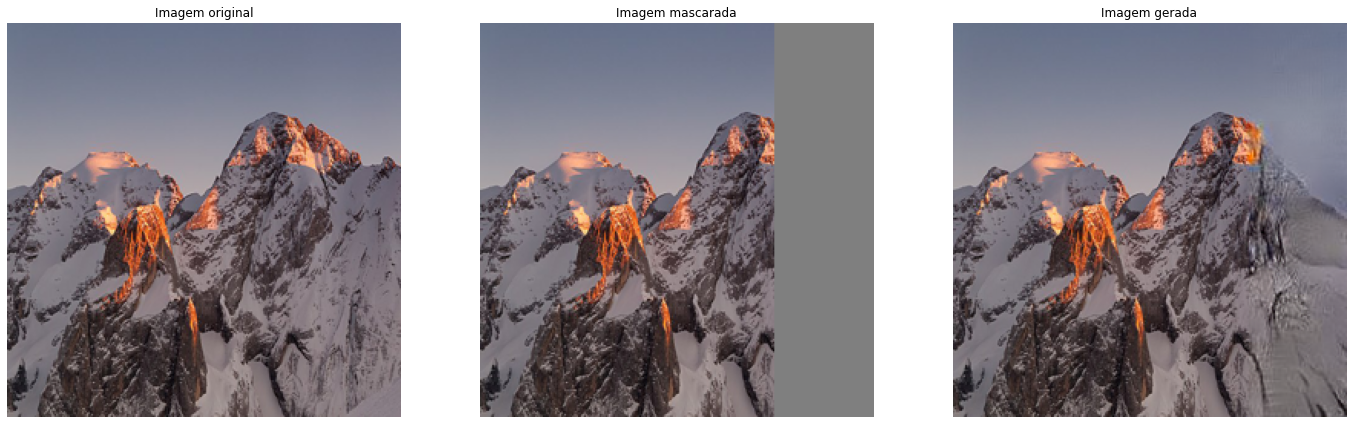

In [ ]:
visualiza_resultados(imagem, imagem_mascarada, imagem_gerada)